# 100_Analysis_Q1A

# _ Question One: Is There a Safest Time for Travel?_

## _ (A): Is it Safer to Drive in the Summer than in the Winter?_


## Purpose

We will now begin to analyse and explore our newly validated and prepared datasets. In this notebook we will explore whether there is a safest time for road travel. In particular, we will analyse whether it is safer to drive in the Summer than in the Winter. To do this, we will use our date and time columns to see whether more accidents occur at certain times of the day/month/year, and how severe these respective accidents are.


### Notebook Contents:

* __1:__ Loading our Datasets
     * __1.1:__ A Closer look at the Data

* __2:__ Accidents by Season
     * __2.1:__ Accident Severity by Season
     * __2.2:__ Aggregate the Data

* __3:__ Weather Conditions     
     * __3.1:__ Aggregate the Data

* __4:__ Saving to Pickle Files & Creating Data Dictionaries



## Datasets

* __Input__:

* 700_Q1AB_final_prep_1.pkl (Fully prepared dataset 1 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_2.pkl (Fully prepared dataset 2 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_3.pkl (Fully prepared dataset 3 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* 700_Q1AB_final_prep_4.pkl (Fully prepared dataset 4 of UK Road Safety Data from 1979 - 2016, for RQ1(A) and (B))


* __Output__: 

* 100_analysis_Q1A_all_seasons_severity.pkl (All accident severity per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_severity.pkl(Normalised accident severity per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_weather.pkl (Normalised weather conditions per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_road_cond.pkl (Normalised road conditions per season of UK Road Accidents from 1979 - 2016)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

## 1. 
## Loading in the Datasets

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets using the pd.read_pickly method, for the purpose of answering this research question.

In [2]:
Q1A_1 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_1.pkl')
Q1A_1.shape

(3011743, 17)

In [3]:
Q1A_2 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_2.pkl')
Q1A_2.shape

(3021931, 17)

In [4]:
Q1A_3 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_3.pkl')
Q1A_3.shape

(3420640, 17)

In [5]:
Q1A_4 = pd.read_pickle('../../data/processed/700_Q1AB_final_prep_4.pkl')
Q1A_4.shape

(3010896, 17)

## 1.1
## A closer look at the data

In [6]:
Q1A_1.head(2) #print the first two lines of the first dataset

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979


In [7]:
Q1A_4.tail(2) #print the last two lines of the last dataset

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year
479546,2016984131316,slight,1,3,29/10/2016,sunday,20:00,917,darkness - lights lit,fine no high winds,dry,car,male,16 - 20,29,10,2016
479547,2016984133416,slight,1,2,25/12/2016,monday,12:30,917,daylight,raining + high winds,wet or damp,car,male,46 - 55,25,12,2016


Above, we have shown the first two and last two lines of data we will be using to answer research Question One (A).

It is important to note that for this question, we will be using data from _1979 - 2016_ only.

## 2.
## Accidents by Season

Since our question is focusing on the seasons of the year rather than the specific date of road accidents, I will create a new column within the dataframe to record the season that each accident occurred in, based on the month column.

In [6]:
newcol_1 = Q1A_1['Month'] #create new column called 'Season' as a copy of Month column
new_Q1A_1 = Q1A_1.assign(Season=newcol_1)

In [7]:
newcol_2 = Q1A_2['Month'] #create new column called 'Season' as a copy of Month column
new_Q1A_2 = Q1A_2.assign(Season=newcol_2)

In [8]:
newcol_3 = Q1A_3['Month'] #create new column called 'Season' as a copy of Month column
new_Q1A_3 = Q1A_3.assign(Season=newcol_3)

In [9]:
newcol_4 = Q1A_4['Month'] #create new column called 'Season' as a copy of Month column
new_Q1A_4 = Q1A_4.assign(Season=newcol_4)

In [10]:
new_Q1A_4.head(2) #print the first two lines of one new dataset

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Season
0,200501BS00001,serious,1,1,04/01/2005,wednesday,17:42,12,daylight,raining no high winds,wet or damp,car,female,66 - 75,04,01,2005,01
1,200501BS00002,slight,1,1,05/01/2005,thursday,17:36,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,36 - 45,05,01,2005,01


Once we have created a 'Season' column in our datasets, we will now use a mapping function to assign the season based on the month that the accident occurred

We have decided to define our seasons as follows: 
* Winter: December - February 
* Spring: March - May
* Summer: June - August
* Autumn: September - November

We used information from the UK Met Office, viewable via [this  link](https://www.metoffice.gov.uk/learning/seasons/) to determine this.

In [11]:
UK_seasons_map = {'12':'Winter', '01':'Winter', '02':'Winter', '03':'Spring', '04':'Spring', '05':'Spring', '06':'Summer', '07':'Summer', '08':'Summer', '09':'Autumn', '10':'Autumn', '11':'Autumn'} #define mapping values

To apply this map function:

* We must specify the column which we want to apply the mapping function to.
* We then must apply a lambda function to our map, which will replace any occurrence of a value that is present in the map, otherwise it will leave the value as the original.

We have used code from [this](https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers) stack overflow question to carry out the mapping function.

In [12]:
new_Q1A_1['Season'] = new_Q1A_1['Season'].apply(lambda s: UK_seasons_map.get(s) if s in UK_seasons_map else s) #apply mapping function to each value in the 'Month' Column
new_Q1A_2['Season'] = new_Q1A_2['Season'].apply(lambda s: UK_seasons_map.get(s) if s in UK_seasons_map else s)
new_Q1A_3['Season'] = new_Q1A_3['Season'].apply(lambda s: UK_seasons_map.get(s) if s in UK_seasons_map else s)
new_Q1A_4['Season'] = new_Q1A_4['Season'].apply(lambda s: UK_seasons_map.get(s) if s in UK_seasons_map else s)

In [13]:
new_Q1A_1.head(2) #display the first 2 lines of one of the updated datasets.

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Date_Day,Month,Year,Season
85587,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,bus or coach,male,26 - 35,07,04,1979,Spring
85588,197903A102220,serious,2,2,07/04/1979,sunday,12:30,63,daylight,fine no high winds,wet or damp,car,male,46 - 55,07,04,1979,Spring


### Group by Season

Since we are focusing on the season in which accidents occur, I will group accidents based on season.

This will produce a `groupby` object, which contains groups in a Python `dict`, indexed, in this case, by `Season` and whose values are the indices of the dataframe rows associated with the corresponding year.

In [14]:
group_by_season_1 = new_Q1A_1.groupby('Season')
group_by_season_1

In [15]:
group_by_season_2 = new_Q1A_2.groupby('Season')
group_by_season_2

In [16]:
group_by_season_3 = new_Q1A_3.groupby('Season')
group_by_season_3

In [17]:
group_by_season_4 = new_Q1A_4.groupby('Season')
group_by_season_4

As an example, we can see below that the keys used by our groupby object are the seasons of the year

In [18]:
group_by_season_1.groups.keys()

dict_keys(['Autumn', 'Spring', 'Summer', 'Winter'])

Below, I will look at how many accidents have occurred in each season, using the size method.

In [19]:
group_by_season_1.size()

Season
Autumn    842172
Spring    712166
Summer    786044
Winter    671361
dtype: int64

In [20]:
group_by_season_2.size()

Season
Autumn    818315
Spring    718922
Summer    766244
Winter    718450
dtype: int64

In [21]:
group_by_season_3.size()

Season
Autumn    925569
Spring    815082
Summer    856038
Winter    823951
dtype: int64

In [22]:
group_by_season_4.size()

Season
Autumn    806653
Spring    728870
Summer    774091
Winter    701282
dtype: int64

So, it seems that most accidents occur in Autumn. Below we will take a further look at these accidents.

## 2.1
## Accident Severity by Season

Here, we will group the accidents from each season into the severity of the accident. this ranges from slight, serious to fatal. This will give us a good indication of not only how many accidents occur in each season, but which season sees the most serious accidents over all.

In [23]:
num_by_season_for_severity_1 = new_Q1A_1.groupby(
    ['Season', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_season_for_severity_1

Accident_Severity,fatal,serious,slight
Season,,,
Autumn,18569,215538,608065
Spring,14525,180584,517057
Summer,16757,199662,569625
Winter,15261,167990,488110


In [24]:
num_by_season_for_severity_2 = new_Q1A_2.groupby(
    ['Season', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_season_for_severity_2

Accident_Severity,fatal,serious,slight
Season,,,
Autumn,14423,146854,657038
Spring,11771,130267,576884
Summer,12805,140229,613210
Winter,13065,129401,575984


In [25]:
num_by_season_for_severity_3 = new_Q1A_3.groupby(
    ['Season', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_season_for_severity_3

Accident_Severity,fatal,serious,slight
Season,,,
Autumn,12873,123280,789416
Spring,11507,111269,692306
Summer,12580,120569,722889
Winter,11871,108422,703658


In [26]:
num_by_season_for_severity_4 = new_Q1A_4.groupby(
    ['Season', 'Accident_Severity'])['Accident_Index'].count().unstack()

num_by_season_for_severity_4

Accident_Severity,fatal,serious,slight
Season,,,
Autumn,10729,105685,690239
Spring,9659,95150,624061
Summer,10668,106632,656791
Winter,9529,86034,605719


## 2.2
## Aggregate the Data

Below we will create a new dataframe containing the total number of accidents which have occurred in each season for all 4 of our datasets, as well as the accident_severity for each.

We will use the pd.concat method to do this.

In [27]:
all_seasons_severity = pd.concat([num_by_season_for_severity_1, num_by_season_for_severity_2, num_by_season_for_severity_3, num_by_season_for_severity_4]).groupby(level=0).sum()
all_seasons_severity

Accident_Severity,fatal,serious,slight
Season,,,
Autumn,56594,591357,2744758
Spring,47462,517270,2410308
Summer,52810,567092,2562515
Winter,49726,491847,2373471


From above, we can see that our dataset contains multiple rows for each season and the corresponding total number of fatal/serious/slight accidents for each season. 

The below plot represents this dataframe.

Text(0,0.5,'total road accidents')

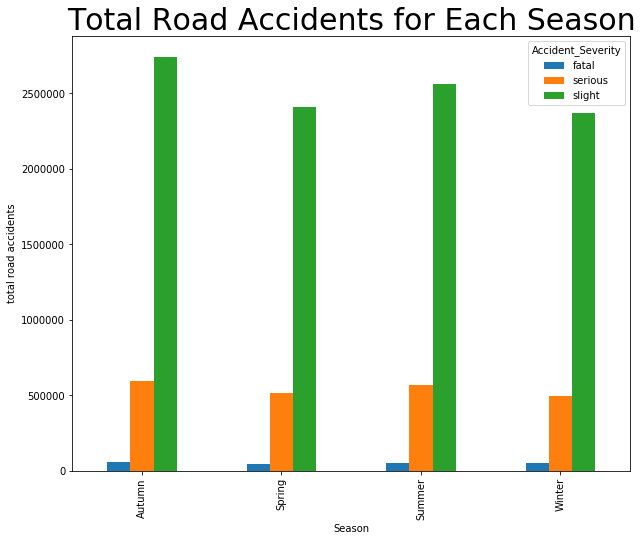

In [31]:
all_seasons_severity.plot(kind='bar', figsize=(10,8))
plt.title('Total Road Accidents for Each Season', fontsize=30)
plt.ylabel('total road accidents')

So, it appears that Autumn sees the highest number of accidents of all severities, with Sumer as a close second. It is interesting to note that the majority of accidents which occur each year are of slight accident severity.

Below we will normalise the data to see how this breakdown compares during the seasons. 

When we normalise, we are getting the sum of the all columns for each row in the dataset.

In [40]:
norm_seasons_severity = all_seasons_severity.copy() #create a dataframe as copy of original

In [41]:
cols_1= norm_seasons_severity.columns #define columns to normalise

In [42]:
sum_rows = norm_seasons_severity[cols_1].sum(axis=1) #calculate the sum of each row

In [43]:
norm_seasons_severity[cols_1] = norm_seasons_severity[cols_1].div(sum_rows, axis=0) #normalise all columns in the dataset by dividing them by the sum of each row

In [50]:
norm_seasons_severity[cols_1] =100*norm_seasons_severity[cols_1] #multiply normalised data by 100 to get a percentage value.

Text(0,0.5,'% of Accidents')

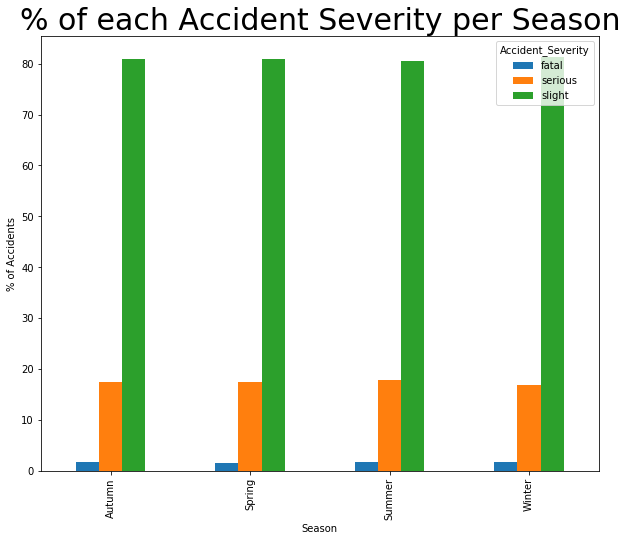

In [51]:
norm_seasons_severity.plot(kind='bar', figsize=(10,8))
plt.title('% of each Accident Severity per Season',  fontsize=30)
plt.ylabel('% of Accidents')

Upon normalising the data, we see that the breakdown of accident severity over each season is almost identical.

We will now add a 'totals' column to visualise the total number of road accidents per season

Text(0,0.5,'Total Road Accidents')

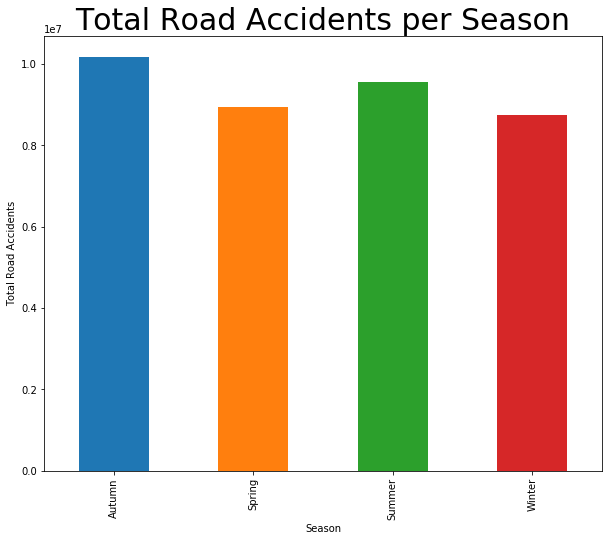

In [54]:
all_seasons_severity['Total'] = all_seasons_severity.sum(axis=1)
all_seasons_severity['Total'].plot(kind='bar', figsize=(10,8))
plt.title('Total Road Accidents per Season',  fontsize=30)
plt.ylabel('Total Road Accidents')

From this plot, we can see the rank of total road accidents as follows: (from most to least)

1. Autumn
2. Summer
3. Spring
4. Winter

## 3.
## Weather Conditions

Above, we have seen that most accidents occur in Autumn, with Summer in close second.


Below we will take a look at the weather conditions which were present when accidents occured per season, to see how they may or may not contribute to road accidents.

In [56]:
num_by_season_for_weather_1 = new_Q1A_1.groupby(
    ['Season',  'Weather_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_weather_1

Weather_Conditions,fine + high winds,fine no high winds,fog or mist,other,raining + high winds,raining no high winds,snowing + high winds,snowing no high winds
Season,,,,,,,,
Autumn,19535,617792,10234,20478,20796,151742,380,1215
Spring,15843,556620,3686,12528,9870,105425,2517,5677
Summer,6260,662770,1971,9013,4792,101137,24,77
Winter,19484,471548,13322,32960,15331,93266,5804,19646


In [57]:
num_by_season_for_weather_2 = new_Q1A_2.groupby(
    ['Season',  'Weather_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_weather_2

Weather_Conditions,fine + high winds,fine no high winds,fog or mist,other,raining + high winds,raining no high winds,snowing + high winds,snowing no high winds
Season,,,,,,,,
Autumn,12104,615752,12890,17381,14938,143874,242,1134
Spring,12143,583807,2440,7809,8964,99815,997,2947
Summer,5126,645515,1267,6470,4443,103299,31,93
Winter,22827,509947,17976,24255,23203,107102,3167,9973


In [58]:
num_by_season_for_weather_3 = new_Q1A_3.groupby(
    ['Season',  'Weather_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_weather_3

Weather_Conditions,fine + high winds,fine no high winds,fog or mist,other,raining + high winds,raining no high winds,snowing + high winds,snowing no high winds
Season,,,,,,,,
Autumn,12480,702134,6604,17300,16829,168859,342,1021
Spring,8587,668465,4251,9170,7415,113499,712,2983
Summer,3680,727170,1299,7102,3996,112583,54,154
Winter,19643,603052,15420,27505,19371,124012,3316,11632


In [59]:
num_by_season_for_weather_4 = new_Q1A_4.groupby(
    ['Season',  'Weather_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_weather_4

Weather_Conditions,fine + high winds,fine no high winds,fog or mist,other,raining + high winds,raining no high winds,snowing + high winds,snowing no high winds
Season,,,,,,,,
Autumn,10362,641372,5817,17013,14158,116071,270,1590
Spring,8919,626199,2791,9246,6353,71127,1173,3062
Summer,3346,670403,825,7407,4134,87837,12,127
Winter,16239,518295,7724,31062,18624,91871,2369,15098


## 3.1
## Aggregate the Data

Below, we will aggregate the four above datasets to get one final dataset which we focus on, again using the pd.concat method.

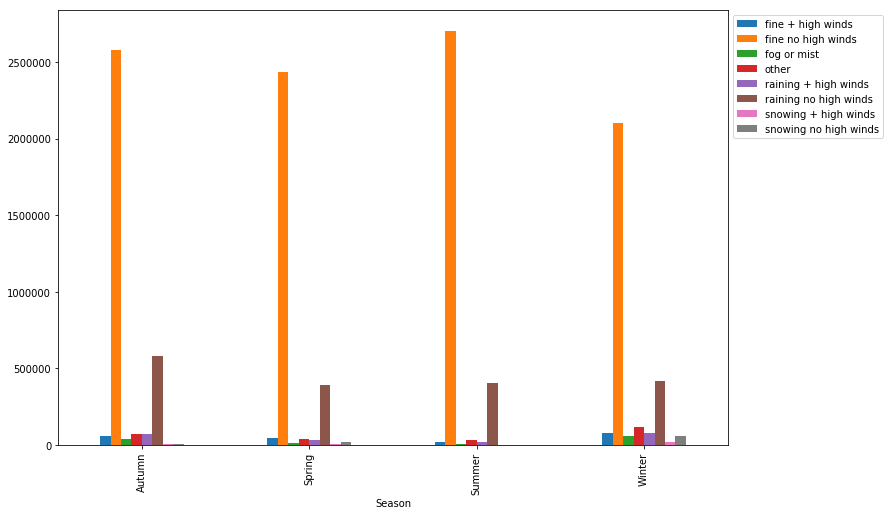

In [60]:
all_seasons_weather = pd.concat([num_by_season_for_weather_1, num_by_season_for_weather_2, num_by_season_for_weather_3, num_by_season_for_weather_4]).groupby(level=0).sum()
all_seasons_weather.plot(kind='bar', figsize=(12,8)).legend(bbox_to_anchor=(1,1))

We can see clearly from this graph that most accidents occur in 'fine, no high winds' weather conditions, with 'raining, no high winds' as the second leading weather condition.

We can also see that during Winter, the number of accidents which occur during snow is at its highest, as we would expect.

Now I will again normalise the data and see how these trends change.

In [61]:
norm_seasons_weather = all_seasons_weather.copy() #create copy of original dataframe to normalise

In [62]:
cols_2 = norm_seasons_weather.columns # define columns to normalise

In [64]:
sum_rows_2 = (norm_seasons_weather[cols_2].sum(axis=1)) #calculate the sum of each row

In [65]:
norm_seasons_weather[cols_2] = norm_seasons_weather[cols_2].div(sum_rows_2, axis=0) #normalise all columns in the dataset by dividing them by the sum of each row 

In [66]:
norm_seasons_weather[cols_2] = 100*norm_seasons_weather[cols_2] #multiply normalised data by 100 to get percentage value

Text(0.5,1,'% of UK Road Accidents per season for all weather conditions')

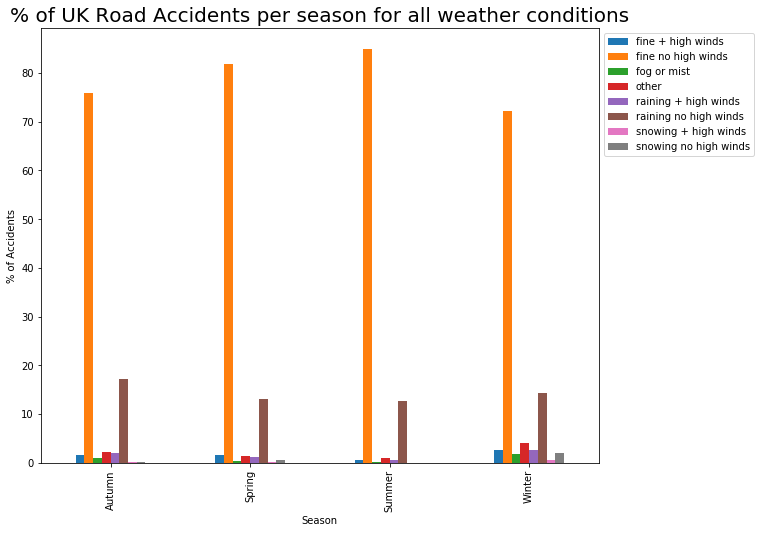

In [72]:
norm_seasons_weather.plot(kind='bar', figsize=(10,8)).legend(bbox_to_anchor=(1,1))
plt.ylabel('% of Accidents')
plt.title('% of UK Road Accidents per season for all weather conditions', fontsize=20)

Once the data has been normalised, it is much easier to see the rise in accidents which occur during the snow in Winter, and interestingly we see that most accidents occur during 'fine no high winds' in the Summer time, as we would expect due to better weather conditions this time of year.

We can also see from the above graph that 'rain no high winds' experiences the second highest number of accidents consistently throughout the seasons. It is important to note that due to the weather patterns in the UK, this data needs to be normalised upon the number of rainy and 'fine' weather days in the UK each year to get a true depiction of road accidents within each weather condition. This is an interesting potential for future work.


## Road Conditions


We will now take a look at the road conditions which were present when accidents occured per season, to see how they may or may not contribute to road accidents.

In [73]:
num_by_season_for_road_cond_1 = new_Q1A_1.groupby(
    ['Season',  'Road_Surface_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_road_cond_1

Road_Surface_Conditions,dry,flood over 3cm. deep,frost or ice,snow,wet or damp
Season,,,,,
Autumn,491222,1502,9848,1072,338528
Spring,492396,789,5109,5230,208642
Summer,619467,1052,85,59,165381
Winter,256007,658,59368,24764,330564


In [74]:
num_by_season_for_road_cond_2 = new_Q1A_2.groupby(
    ['Season',  'Road_Surface_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_road_cond_2

Road_Surface_Conditions,dry,flood over 3cm. deep,frost or ice,snow,wet or damp
Season,,,,,
Autumn,477235,1134,9722,858,329366
Spring,527117,628,2683,2170,186324
Summer,601820,818,98,87,163421
Winter,295957,1402,37920,10254,372917


In [75]:
num_by_season_for_road_cond_3 = new_Q1A_3.groupby(
    ['Season',  'Road_Surface_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_road_cond_3

Road_Surface_Conditions,dry,flood over 3cm. deep,frost or ice,snow,wet or damp
Season,,,,,
Autumn,541806,1601,6445,1009,374708
Spring,599904,741,2921,2170,209346
Summer,676180,1169,132,99,178458
Winter,350009,1277,43011,11617,418037


In [76]:
num_by_season_for_road_cond_4 = new_Q1A_4.groupby(
    ['Season',  'Road_Surface_Conditions'])['Accident_Index'].count().unstack()

num_by_season_for_road_cond_4

Road_Surface_Conditions,dry,flood over 3cm. deep,frost or ice,snow,wet or damp
Season,,,,,
Autumn,527120,1253,6676,1375,270229
Spring,580986,544,3679,2704,140957
Summer,630433,961,56,95,142546
Winter,326750,1247,45044,13753,314488


## Aggregate the Data

We will now concatenate each of these sub-datasets to produce a final dataset which we can use to plot our results

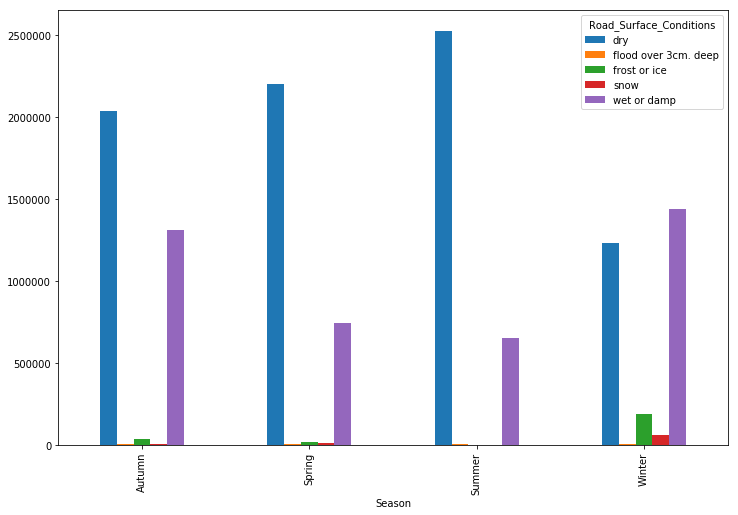

In [77]:
all_seasons_road_cond = pd.concat([num_by_season_for_road_cond_1, num_by_season_for_road_cond_2, num_by_season_for_road_cond_3, num_by_season_for_road_cond_4]).groupby(level=0).sum()
all_seasons_road_cond.plot(kind='bar', figsize=(12,8))

This graph shows us that most accidents occur during dry weather, with wet or damp weather in second.

We can also see that the number of accidents which occur on snowy roads increases during Winter.

This is consistent with our previous graph showing Weather conditions.

However, I will again normalise the data below and see how these trends change.

In [79]:
norm_seasons_road_cond = all_seasons_road_cond.copy() #create dataframe as copy of original

In [80]:
cols_3 = norm_seasons_road_cond.columns #define columns to normalise

In [81]:
sum_rows_3 = norm_seasons_road_cond[cols_3].sum(axis=1) #calculate sum of all rows in dataframe

In [82]:
norm_seasons_road_cond[cols_3] = norm_seasons_road_cond[cols_3].div(sum_rows_3, axis=0) #normalise all columns in dataframe by dividing by sum of rows 

In [83]:
norm_seasons_road_cond[cols_3] = 100*norm_seasons_road_cond[cols_3] #multiply by 100 to get percentage value

Text(0.5,0,'% of Road Accidents')

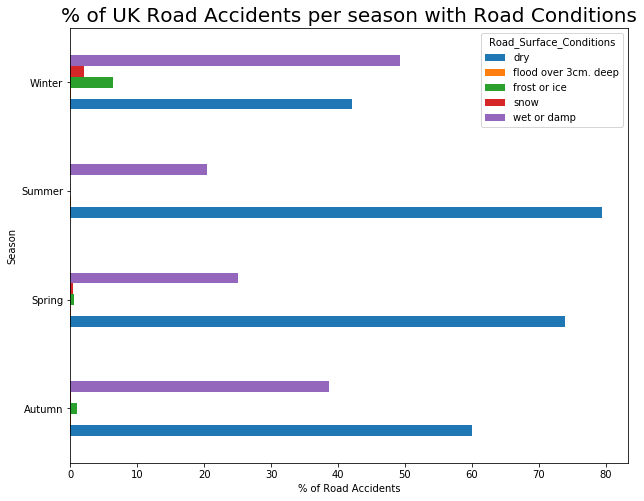

In [85]:
norm_seasons_road_cond.plot(kind='barh', figsize=(10,8))
plt.title('% of UK Road Accidents per season with Road Conditions', fontsize=20)
plt.xlabel('% of Road Accidents')

From above, we can see that through normalising the data there is not a huge difference in the graph above as we saw before.

It is again important to note that some future work could be to normalise the data further based on the number of dry/wet/snowy days in the UK.

## 4.
# Saving to Pickle Files & Creating Data Dictionaries

We will now save our datasets with grouped data as pickle files, and create data dictionaries to summarise their contents

In [25]:
all_seasons_severity.to_pickle("../../data/analysis/100_analysis_Q1A_all_seasons_severity.pkl")
all_seasons_severity.shape

(4, 3)

In [26]:
data_dictionary.save(
    '../../data/analysis/100_analysis_Q1A_all_seasons_severity.pkl', 
    "Updated Roadsafety dataset with added column 'Season'").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,4.0,51648.0,3959.370320,47462.0,49160.00,51268.0,53756.00,56594.0,0,0.0
serious,4.0,541891.5,45433.361945,491847.0,510914.25,542181.0,573158.25,591357.0,0,0.0
slight,4.0,2522763.0,169111.629620,2373471.0,2401098.75,2486411.5,2608075.75,2744758.0,0,0.0


In [51]:
norm_seasons_severity.to_pickle("../../data/analysis/100_analysis_Q1A_norm_seasons_severity.pkl")
norm_seasons_severity.shape

(4, 3)

In [52]:
data_dictionary.save(
    '../../data/analysis/100_analysis_Q1A_norm_seasons_severity.pkl', 
    "Updated Roadsafety dataset with added column 'Season'").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,4.0,1.657179,0.045886,1.595340,1.643408,1.663769,1.677540,1.705840,0,0.0
serious,4.0,17.377369,0.388621,16.872713,17.258423,17.408612,17.527557,17.819538,0,0.0
slight,4.0,80.965452,0.370691,80.521032,80.806505,80.959665,81.118612,81.421447,0,0.0


In [53]:
norm_seasons_weather.to_pickle("../../data/analysis/100_analysis_Q1A_norm_seasons_weather.pkl")
norm_seasons_weather.shape

(4, 8)

In [54]:
data_dictionary.save(
    '../../data/analysis/100_analysis_Q1A_norm_seasons_weather.pkl', 
    "Updated Roadsafety dataset with added column 'Season'").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Weather_Conditions,,,,,,,,,,
fine + high winds,4.0,1.598974,0.860230,0.578554,1.291480,1.567474,1.874968,2.682395,0,0.0
fine no high winds,4.0,78.742999,5.788198,72.137573,75.003249,78.904586,82.644336,85.025250,0,0.0
fog or mist,4.0,0.881603,0.753007,0.168488,0.374084,0.745152,1.252671,1.867622,0,0.0
other,4.0,2.086045,1.351506,0.942428,1.212560,1.714936,2.588420,3.971878,0,0.0
raining + high winds,4.0,1.558354,0.920966,0.545654,0.958302,1.531225,2.131278,2.625312,0,0.0


In [55]:
norm_seasons_road_cond.to_pickle("../../data/analysis/100_analysis_Q1A_norm_seasons_road_cond.pkl")
norm_seasons_road_cond.shape

(4, 5)

In [56]:
data_dictionary.save(
    '../../data/analysis/100_analysis_Q1A_norm_seasons_road_cond.pkl', 
    "Updated Roadsafety dataset with added column 'Season'").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Road_Surface_Conditions,,,,,,,,,,
dry,4.0,63.899592,16.636851,42.151096,55.576628,67.006968,75.329933,79.433336,0,0.0
flood over 3cm. deep,4.0,0.133896,0.032903,0.090822,0.116974,0.141472,0.158394,0.161818,0,0.0
frost or ice,4.0,1.954284,2.961522,0.011658,0.365733,0.723662,2.312213,6.358154,0,0.0
snow,4.0,0.655501,0.959043,0.010684,0.098037,0.269860,0.827324,2.071598,0,0.0
wet or damp,4.0,33.356727,13.138527,20.418631,23.892699,31.873189,41.337216,49.261898,0,0.0
